In [1]:
# 数据处理部分之前的代码，加入部分数据处理的库
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import gzip
import json
import random
import numpy as np

In [2]:
# 声明数据集文件位置
datafile = './work/mnist.json.gz'
print('loading mnist dataset from {} ......'.format(datafile))
# 加载json数据文件
data = json.load(gzip.open(datafile))
print('mnist dataset load done')
# 读取到的数据区分训练集，验证集，测试集
train_set, val_set, eval_set = data

# 观察训练集数据
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))

# 观察验证集数量
imgs, labels = val_set[0], val_set[1]
print("验证数据集数量: ", len(imgs))

# 观察测试集数量
imgs, labels = val= eval_set[0], eval_set[1]
print("测试数据集数量: ", len(imgs))
print(len(imgs[0]))

loading mnist dataset from ./work/mnist.json.gz ......
mnist dataset load done
训练数据集数量:  50000
验证数据集数量:  10000
测试数据集数量:  10000
784


In [3]:
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))
# 获得数据集长度
imgs_length = len(imgs)
# 定义数据集每个数据的序号，根据序号读取数据
index_list = list(range(imgs_length))
# 读入数据时用到的批次大小
BATCHSIZE = 100

# 随机打乱训练数据的索引序号
random.shuffle(index_list)

# 定义数据生成器，返回批次数据
def data_generator():
    imgs_list = []
    labels_list = []
    for i in index_list:
        # 将数据处理成希望的类型
        img = np.array(imgs[i]).astype('float32')
        label = np.array(labels[i]).astype('float32')
        imgs_list.append(img) 
        labels_list.append(label)
        if len(imgs_list) == BATCHSIZE:
            # 获得一个batchsize的数据，并返回
            yield np.array(imgs_list), np.array(labels_list)
            # 清空数据读取列表
            imgs_list = []
            labels_list = []

    # 如果剩余数据的数目小于BATCHSIZE，
    # 则剩余数据一起构成一个大小为len(imgs_list)的mini-batch
    if len(imgs_list) > 0:
        yield np.array(imgs_list), np.array(labels_list)
    return data_generator

训练数据集数量:  50000


In [4]:
# 声明数据读取函数，从训练集中读取数据
train_loader = data_generator
# 以迭代的形式读取数据
for batch_id, data in enumerate(train_loader()):
    image_data, label_data = data
    if batch_id == 0:
        # 打印数据shape和类型
        print("打印第一个batch数据的维度:")
        print("图像维度: {}, 标签维度: {}".format(image_data.shape, label_data.shape))
    break

打印第一个batch数据的维度:
图像维度: (100, 784), 标签维度: (100,)


In [5]:
imgs_length = len(imgs)

assert len(imgs) == len(labels), "length of train_imgs({}) should be the same as train_labels({})".format(len(imgs), len(labels))

In [6]:
# 声明数据读取函数，从训练集中读取数据
train_loader = data_generator
# 以迭代的形式读取数据
for batch_id, data in enumerate(train_loader()):
    image_data, label_data = data
    if batch_id == 0:
        # 打印数据shape和类型
        print("打印第一个batch数据的维度，以及数据的类型:")
        print("图像维度: {}, 标签维度: {}, 图像数据类型: {}, 标签数据类型: {}".format(image_data.shape, label_data.shape, type(image_data), type(label_data)))
    break

打印第一个batch数据的维度，以及数据的类型:
图像维度: (100, 784), 标签维度: (100,), 图像数据类型: <class 'numpy.ndarray'>, 标签数据类型: <class 'numpy.ndarray'>


In [7]:
def load_data(mode='train'):
    datafile = './work/mnist.json.gz'
    print('loading mnist dataset from {} ......'.format(datafile))
    # 加载json数据文件
    data = json.load(gzip.open(datafile))
    print('mnist dataset load done')
   
    # 读取到的数据区分训练集，验证集，测试集
    train_set, val_set, eval_set = data
    if mode=='train':
        # 获得训练数据集
        imgs, labels = train_set[0], train_set[1]
    elif mode=='valid':
        # 获得验证数据集
        imgs, labels = val_set[0], val_set[1]
    elif mode=='eval':
        # 获得测试数据集
        imgs, labels = eval_set[0], eval_set[1]
    else:
        raise Exception("mode can only be one of ['train', 'valid', 'eval']")
    print("训练数据集数量: ", len(imgs))
    
    # 校验数据
    imgs_length = len(imgs)

    assert len(imgs) == len(labels), \
          "length of train_imgs({}) should be the same as train_labels({})".format(len(imgs), len(labels))
    
    # 获得数据集长度
    imgs_length = len(imgs)
    
    # 定义数据集每个数据的序号，根据序号读取数据
    index_list = list(range(imgs_length))
    # 读入数据时用到的批次大小
    BATCHSIZE = 100
    
    # 定义数据生成器
    def data_generator():
        if mode == 'train':
            # 训练模式下打乱数据
            random.shuffle(index_list)
        imgs_list = []
        labels_list = []
        for i in index_list:
            # 将数据处理成希望的类型
            img = np.array(imgs[i]).astype('float32')
            label = np.array(labels[i]).astype('float32')
            imgs_list.append(img) 
            labels_list.append(label)
            if len(imgs_list) == BATCHSIZE:
                # 获得一个batchsize的数据，并返回
                yield np.array(imgs_list), np.array(labels_list)
                # 清空数据读取列表
                imgs_list = []
                labels_list = []
    
        # 如果剩余数据的数目小于BATCHSIZE，
        # 则剩余数据一起构成一个大小为len(imgs_list)的mini-batch
        if len(imgs_list) > 0:
            yield np.array(imgs_list), np.array(labels_list)
    return data_generator

In [8]:
# 数据处理部分之后的代码,数据读取的部分调用Load_data函数
# 定义网络结构,同上一节所使用的网络结构
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        # 定义一层全连接层，输出维度是1
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)

    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

In [9]:
# 训练配置，并启动训练过程
def train(model):
    model = MNIST()
    model.train()
    #调用加载数据的函数
    train_loader = load_data('train')
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 10
    for epoch_id in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            #准备数据，变得更加简洁
            images, labels = data
            images = paddle.to_tensor(images)
            labels = paddle.to_tensor(labels) 

            #前向计算的过程
            predits = model(images)
            
            #计算损失，取一个批次样本损失的平均值
            loss = F.square_error_cost(predits, labels)
            avg_loss = paddle.mean(loss)      
            
            #每训练了200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    # 保存模型
    paddle.save(model.state_dict(), './mnist.pdparams')
# 创建模型           
model = MNIST()
# 启动训练过程
train(model)

loading mnist dataset from ./work/mnist.json.gz ......
mnist dataset load done
训练数据集数量:  50000
epoch: 0, batch: 0, loss is: [26.109097]
epoch: 0, batch: 200, loss is: [9.334834]
epoch: 0, batch: 400, loss is: [9.555192]
epoch: 1, batch: 0, loss is: [9.159874]
epoch: 1, batch: 200, loss is: [8.409426]
epoch: 1, batch: 400, loss is: [9.933119]
epoch: 2, batch: 0, loss is: [10.05407]
epoch: 2, batch: 200, loss is: [8.490785]
epoch: 2, batch: 400, loss is: [9.09867]
epoch: 3, batch: 0, loss is: [10.027131]
epoch: 3, batch: 200, loss is: [9.76083]
epoch: 3, batch: 400, loss is: [9.906338]
epoch: 4, batch: 0, loss is: [10.721919]
epoch: 4, batch: 200, loss is: [8.597389]
epoch: 4, batch: 400, loss is: [9.889738]
epoch: 5, batch: 0, loss is: [9.490322]
epoch: 5, batch: 200, loss is: [9.707955]
epoch: 5, batch: 400, loss is: [9.575941]
epoch: 6, batch: 0, loss is: [8.329902]
epoch: 6, batch: 200, loss is: [8.258347]
epoch: 6, batch: 400, loss is: [9.070739]
epoch: 7, batch: 0, loss is: [7.8332

In [11]:
import json
import gzip
import paddle
from paddle.vision.transforms import Normalize
from paddle.io import Dataset

# 定义图像归一化处理方法，这里的CHW指图像的格式需为[C通道数，H图像高度，W图像宽度]
transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')

class MNISTDataset(Dataset):
    """
    步骤一：继承paddle.io.Dataset
    """
    def __init__(self, datafile, mode='train', transform=None):
        """
        步骤二：实现构造函数，定义数据读取方式、划分数据集和预处理
        """
        super().__init__()

        self.mode = mode
        self.transform = transform

        print('loading mnist dataset from {} ......'.format(datafile))
        # 加载json数据文件
        data = json.load(gzip.open(datafile))
        print('mnist dataset load done')

        # 读取到的数据区分训练集，验证集，测试集
        train_set, val_set, eval_set = data

        if mode=='train':
            # 获得训练数据集
            self.imgs, self.labels = train_set[0], train_set[1]
        elif mode=='valid':
            # 获得验证数据集
            self.imgs, self.labels = val_set[0], val_set[1]
        elif mode=='test':
            # 获得测试数据集
            self.imgs, self.labels = eval_set[0], eval_set[1]
        else:
            raise Exception("mode can only be one of ['train', 'valid', 'eval']")
    
    def __getitem__(self, index):
        """
        步骤三：实现__getitem__方法，读取指定图片和对应标签
        """
        data, label = self.imgs[index], self.labels[index]
        
        return self.transform(data), label
    
    def __len__(self):
        """
        步骤四：实现__len__方法，返回数据集大小
        """
        return len(self.imgs)
    
datafile = './work/mnist.json.gz'

# 下载数据集并初始化DataSet
train_dataset = MNISTDataset(datafile, mode='train', transform=transform)
test_dataset = MNISTDataset(datafile, mode='test', transform=transform)

print('train images: ', train_dataset.__len__(), ', test images: ', test_dataset.__len__())

loading mnist dataset from ./work/mnist.json.gz ......
mnist dataset load done
loading mnist dataset from ./work/mnist.json.gz ......
mnist dataset load done
train images:  50000 , test images:  10000


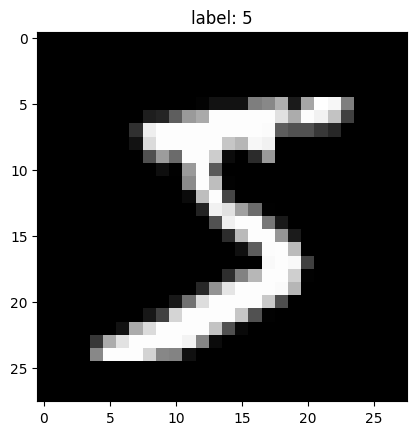

In [13]:
from matplotlib import pyplot as plt

for data in train_dataset:
    img, label = data
    img = img.reshape([28, 28])
    plt.imshow(img, cmap='gray')
    plt.title('label: {}'.format(label))
    plt.show()
    break

In [14]:
# 定义并初始化数据读取器
train_loader = paddle.io.DataLoader(train_dataset, batch_size=64, shuffle=True, 
                                    num_workers=1, 
                                    drop_last=True)
print('step num:',len(train_loader))

step num: 781


C:\Users\gudeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\paddle\fluid\reader.py:486: UserWarning: DataLoader with multi-process mode is not supported on MacOs and Windows currently. Please use signle-process mode with num_workers = 0 instead
  warnings.warn(


In [15]:
def train(model):
    print('train:')
    model.train()
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 3
    for epoch_id in range(EPOCH_NUM):
        print('epoch:',epoch_id)
        for batch_id, data in enumerate(train_loader()):
            images, labels = data
            images = paddle.to_tensor(images).astype('float32')
            labels = paddle.to_tensor(labels).astype('float32')
            
            images = paddle.reshape(images, [images.shape[0], images.shape[2]*images.shape[3]])

            #前向计算的过程  
            predicts = model(images)

            #计算损失，取一个批次样本损失的平均值
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)       
            
            #每训练了200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    #保存模型参数
    paddle.save(model.state_dict(), 'mnist.pdparams')

#创建模型
print("create model:")
model = MNIST()
#启动训练过程
train(model)

create model:
train:
epoch: 0
epoch: 0, batch: 0, loss is: [36.24266]
epoch: 0, batch: 200, loss is: [8.601807]
epoch: 0, batch: 400, loss is: [7.7801805]
epoch: 0, batch: 600, loss is: [7.187891]
epoch: 1
epoch: 1, batch: 0, loss is: [6.6082897]
epoch: 1, batch: 200, loss is: [8.333218]
epoch: 1, batch: 400, loss is: [8.354406]
epoch: 1, batch: 600, loss is: [8.710424]
epoch: 2
epoch: 2, batch: 0, loss is: [6.927799]
epoch: 2, batch: 200, loss is: [9.739254]
epoch: 2, batch: 400, loss is: [9.835999]
epoch: 2, batch: 600, loss is: [9.817633]
